pip install plotnine

In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import randomcolor as rc
from plotnine import ggplot as gg

In [2]:
sales=pd.read_csv("D:/A LABS FLODER/python classes/python case_studys/Case Study 4 - Python Visualizations Case Study/SalesData.csv")
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccountId           3709 non-null   int64  
 1   AccountName         3709 non-null   object 
 2   Region              3709 non-null   object 
 3   Division            3709 non-null   object 
 4   City                3709 non-null   object 
 5   State               3709 non-null   object 
 6   Tier                3709 non-null   object 
 7   Month               3709 non-null   object 
 8   Sales2015           3709 non-null   float64
 9   Sales2016           3709 non-null   float64
 10  Units2015           3709 non-null   float64
 11  Units2016           3709 non-null   float64
 12  TargetAchevied2015  3709 non-null   float64
 13  TargetAchevied2016  3709 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 405.8+ KB


# 1. Compare Sales by region for 2016 with 2015 using bar chart

In [4]:
compare=sales.groupby(by='Region')[['Sales2015','Sales2016']].sum()
compare

,Sales2015,Sales2016
Region,,
Central,7.891729e+06,9.787809e+06
East,9.512916e+06,1.266723e+07
West,5.349745e+06,7.209689e+06


#converting wide to long format
compare=sales.groupby(by='Region')[['Sales2015','Sales2016']].sum().stack().reset_index()
compare.columns=['Region','Sales_year','Sales']
compare

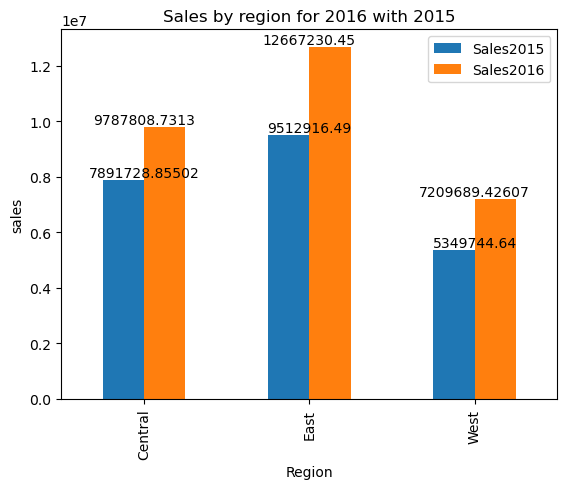

In [5]:
compare.plot(kind='bar')
plt.ylabel('sales')
plt.title("Sales by region for 2016 with 2015")
for i, val in enumerate(compare['Sales2015']):
    plt.text(i, val + 200, str(val), ha='center', va='bottom')
for i, val in enumerate(compare['Sales2016']):
    plt.text(i, val + 200, str(val), ha='center', va='bottom')
plt.show()

# 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart


In [6]:
k=sales.groupby(by='Region')[['Sales2016']].sum()
k

,Sales2016
Region,
Central,9.787809e+06
East,1.266723e+07
West,7.209689e+06


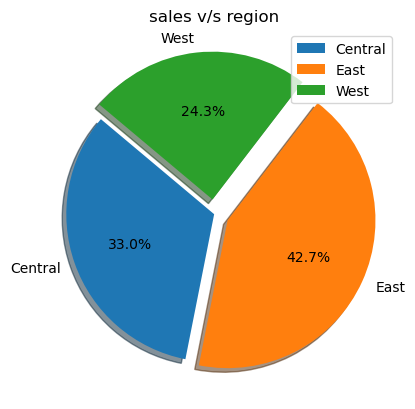

In [7]:
plt.pie(k['Sales2016'], labels=k.index, autopct='%1.1f%%', startangle=140,shadow=True,explode=(0,0.1,0.1))
plt.title('sales v/s region')
plt.legend(list(k.index),loc = 'upper right')
plt.show()

# 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [8]:
m=pd.pivot_table(data=sales,index='Region',columns='Tier',values=['Sales2016','Sales2015'],aggfunc='sum')
m

Sales2015                                      Sales2016  \
Tier           High        Low           Med       Out        High   
Region                                                               
Central  4798698.43  943439.67  2.068226e+06  81364.89  6026042.94   
East     6102946.12  901665.80  2.470998e+06  37306.55  7817151.10   
West     2944789.26  671064.38  1.718476e+06  15415.08  3768038.35   

                                            
Tier            Low           Med      Out  
Region                                      
Central  1132832.85  2.632181e+06 -3248.53  
East     1144929.59  3.705150e+06     0.00  
West     1099502.18  2.342149e+06     0.00

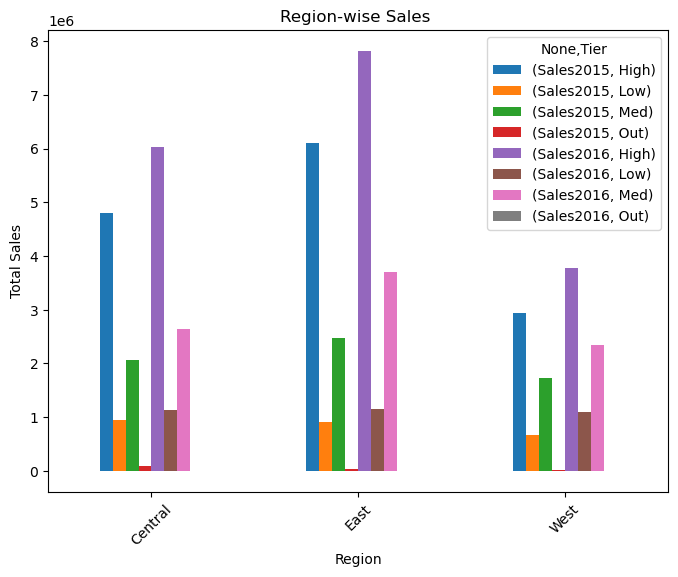

In [57]:
m.plot(kind='bar', figsize=(8, 6))
plt.title('Region-wise Sales ')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# 4. In East region, which state registered a decline in 2016 as compared to 2015?

In [10]:
region=sales[(sales['Region']=='East')].groupby(by=['State'])[['Sales2015','Sales2016']].sum()
region

,Sales2015,Sales2016
State,,
CT,197202.790,323502.31
DC,216723.950,257421.69
FL,1660162.000,2508232.28
GA,681546.460,946919.77
MA,419278.750,687096.45
MD,527309.060,750008.79
ME,77425.640,183673.05
NC,1292801.640,1610521.00
NH,136419.380,144717.51


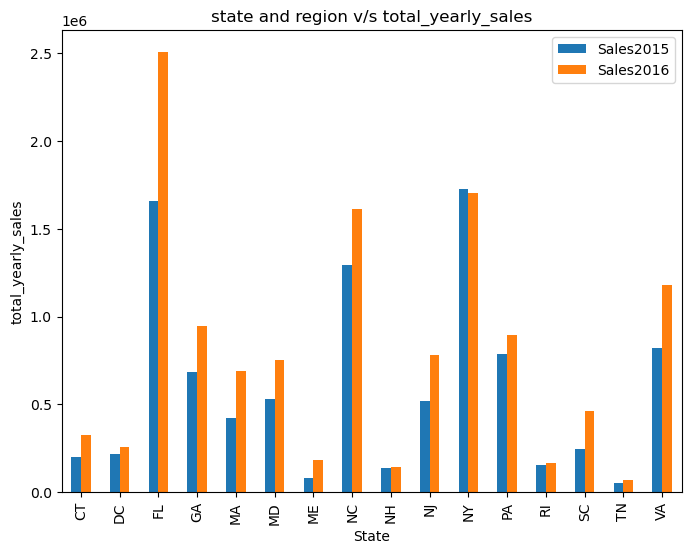

NY is registered a decline in 2016 as compared to 2015


In [11]:
region.plot(kind='bar',figsize=(8, 6))
plt.title("state and region v/s total_yearly_sales")
plt.ylabel('total_yearly_sales')
plt.show()
print('NY is registered a decline in 2016 as compared to 2015')

# 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?


In [12]:
l=sales[(sales['Tier']=='High')].groupby(by=['Tier','Division'])[['Units2015','Units2016']].sum()
l

Units2015  Units2016
Tier Division                            
High BIG APPLE        180.8330   231.0000
     CHARGERS         123.6666   164.4999
     CONGRESSIONAL    164.5003   205.0000
     DIAMONDBACK      153.3334   176.6667
     EMPIRE           414.3332   449.3332
     GRIDIRON         213.6673   246.1675
     GULF STREAM      185.0000   301.0009
     HAILSTORM        187.8338   247.0003
     KINETIC          214.3334   244.5001
     MINUTEMEN        215.0000   267.5000
     MUDDY WATERS     150.6666   211.5004
     NORDIC           210.1675   225.8334
     NORTHWEST        135.5008   163.6669
     ORION            175.8334   276.0000
     RACEWAY          178.3338   297.0000
     REVOLUTION       205.8335   226.8334
     RIPTIDE          147.5002   183.8336
     SOUTHERN STAR    230.0000   274.1665
     STAMPEDE         192.4999   246.8333
     SYNERGY          322.6666   428.3334
     THE CAROLINAS    258.8335   345.0000
     TORNADO VALLEY   128.3331   181.0004
     VICTORY          174.5005   221.1669
     WAVE RIDER       173.4996   223.3332
     WOLVERINE        122.0002   143.0000
     WRANGLER         206.1666   259.6666

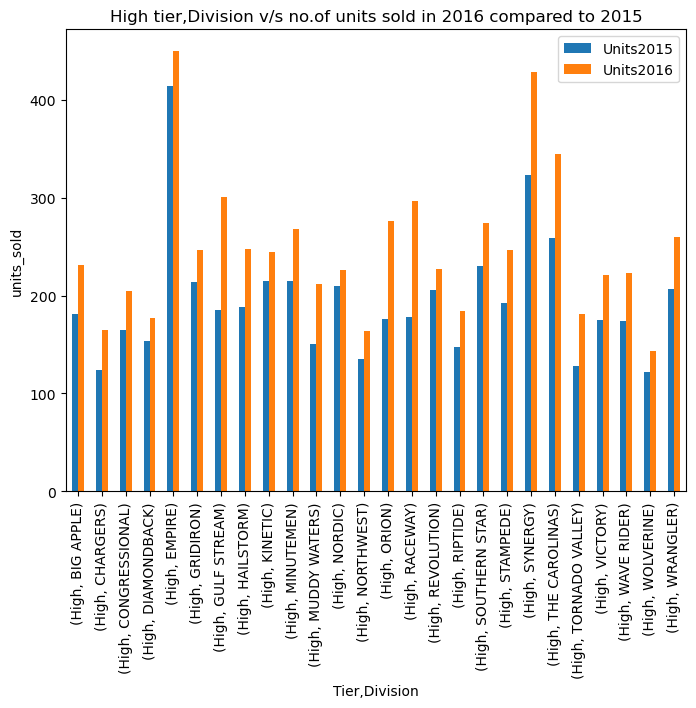

In [13]:
l.plot(kind='bar',figsize=(8,6))
plt.title('High tier,Division v/s no.of units sold in 2016 compared to 2015')
plt.ylabel('units_sold')
plt.show()

# 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
### • Jan - Mar : Q1
### • Apr - Jun : Q2
### • Jul - Sep : Q3
### • Oct - Dec : Q4

In [14]:
def qtr (var):
    if var in ('Jun','Feb','Mar'):
        return 'q1'
    elif var in ('Apr','May','Jun'):
        return' q2'
    elif var in ('Jul','Aug','Sep'):
        return 'q3'
    else:
        return 'q4'

In [15]:
sales['qtr']=sales.Month.apply(qtr)

# 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

In [16]:
df=sales.groupby(by='qtr')[['Sales2015','Sales2016']].sum().reset_index()
df

,qtr,Sales2015,Sales2016
0,q2,3.581166e+06,4.698470e+06
1,q1,5.486970e+06,7.091467e+06
2,q3,6.164094e+06,7.861546e+06
3,q4,7.522161e+06,1.001325e+07


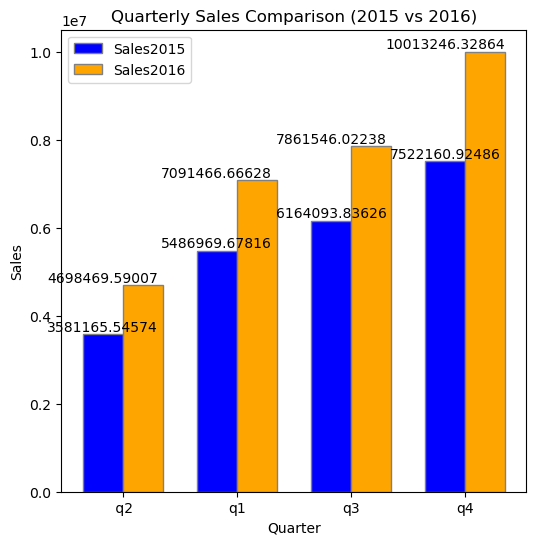

In [17]:
plt.figure(figsize=(6, 6))  
bar_width = 0.35
r1 = range(len(df))
plt.bar(r1, df['Sales2015'], width = bar_width, color = 'blue', edgecolor = 'grey', label='Sales2015')
for i, val in enumerate(df['Sales2015']):
    plt.text(i, val + 200, str(val), ha='center', va='bottom')
plt.bar([i + bar_width for i in r1], df['Sales2016'], width = bar_width, color = 'orange', edgecolor = 'grey', label='Sales2016')
for i, val in enumerate(df['Sales2016']):
    plt.text(i, val + 200, str(val), ha='center', va='bottom')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.title('Quarterly Sales Comparison (2015 vs 2016)')
plt.xticks([r + bar_width/2 for r in r1], df['qtr'])
plt.legend()
plt.show()


# 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.
### (Draw 4 pie charts representing a Quarter for each Tier)


In [18]:
df1=sales.groupby(by=['Tier','qtr'])[['Sales2016']].sum().unstack()
df1

Sales2016                                          
qtr             q2            q1            q3            q4
Tier                                                        
High  2.602273e+06  4.121555e+06  4.872559e+06  6.014846e+06
Low   6.815252e+05  8.067038e+05  7.951777e+05  1.093858e+06
Med   1.414672e+06  2.163208e+06  2.197058e+06  2.904543e+06
Out   0.000000e+00  0.000000e+00 -3.248530e+03  0.000000e+00

In [47]:
# Take the absolute values
df1_abs = df1.abs()

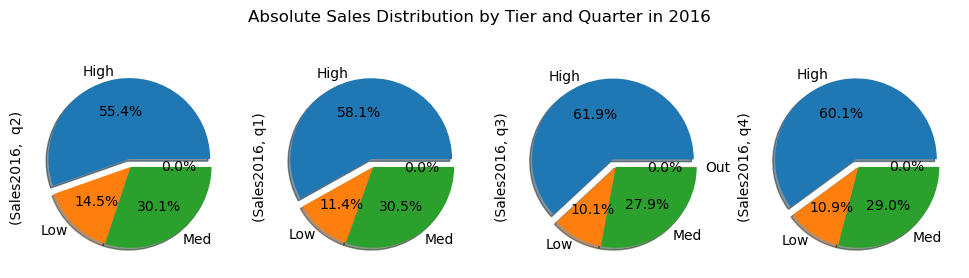

In [61]:
df1_abs.plot.pie(subplots=True, figsize=(12, 3), autopct='%1.1f%%', legend=False,shadow=True,explode=(0.1,0,0,0))
plt.suptitle('Absolute Sales Distribution by Tier and Quarter in 2016', y=1.02)
plt.show()